In [1]:
!pip install pydriller

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.6 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Repository** **1**

In [4]:
!git clone https://github.com/oobabooga/text-generation-webui

fatal: destination path 'text-generation-webui' already exists and is not an empty directory.


In [6]:
import csv
import os
import subprocess
from pydriller import Repository

REPO_PATH = r"/content/text-generation-webui"
OUTPUT_CSV = "/content/drive/MyDrive/Lab_4_Output_text-generation.csv"

def get_git_diff(repo_path, commit_sha, parent_sha, diff_algo="myers"):

    cmd = [
        "git", "-C", repo_path, "diff",
        parent_sha, commit_sha,
        f"--diff-algorithm={diff_algo}",
        "--ignore-all-space", "--ignore-blank-lines"
    ]
    try:
        diff_output = subprocess.check_output(cmd, stderr=subprocess.DEVNULL)
        return diff_output.decode("utf-8", errors="ignore")
    except subprocess.CalledProcessError:
        return ""


# Main Processing
with open(OUTPUT_CSV, mode="w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    # Header
    writer.writerow([
        "repo", "old_file_path", "new_file_path", "commit_sha",
        "parent_commit_sha", "commit_message", "diff_myers",
        "diff_histogram", "Discrepancy"
    ])

    repo_name = os.path.basename(REPO_PATH)
    print(f"Analyzing repository: {repo_name}")

    # Iterate commits using PyDriller
    for commit in Repository(path_to_repo=REPO_PATH).traverse_commits():
        commit_sha = commit.hash
        parents = commit.parents
        commit_msg = commit.msg.strip()

        # If no parent (initial commit), skip
        if not parents:
            continue

        parent_sha = parents[0]  # Taking the first parent (skip merge complexity)

        # Get diffs for each modified file
        for mod in commit.modified_files:
            old_path = mod.old_path or ""
            new_path = mod.new_path or ""

            diff_myers = get_git_diff(REPO_PATH, commit_sha, parent_sha, diff_algo="myers")
            diff_hist = get_git_diff(REPO_PATH, commit_sha, parent_sha, diff_algo="histogram")
            discrepancy = "No" if diff_myers.strip() == diff_hist.strip() else "Yes"

            # Write to CSV
            writer.writerow([
                repo_name, old_path, new_path, commit_sha, parent_sha,
                commit_msg, diff_myers, diff_hist, discrepancy
            ])

print(f"\n Diff analysis completed for {repo_name}. Data saved to {OUTPUT_CSV}")


Analyzing repository: text-generation-webui

 Diff analysis completed for text-generation-webui. Data saved to /content/drive/MyDrive/Lab_4_Output_text-generation.csv


/tmp/ipython-input-232812669.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mismatch['category'] = df_mismatch['new_file_path'].apply(categorize_file)


Mismatch counts by category:
category
Source Code    717
Other          428
README          42
Test Code        1
Name: count, dtype: int64


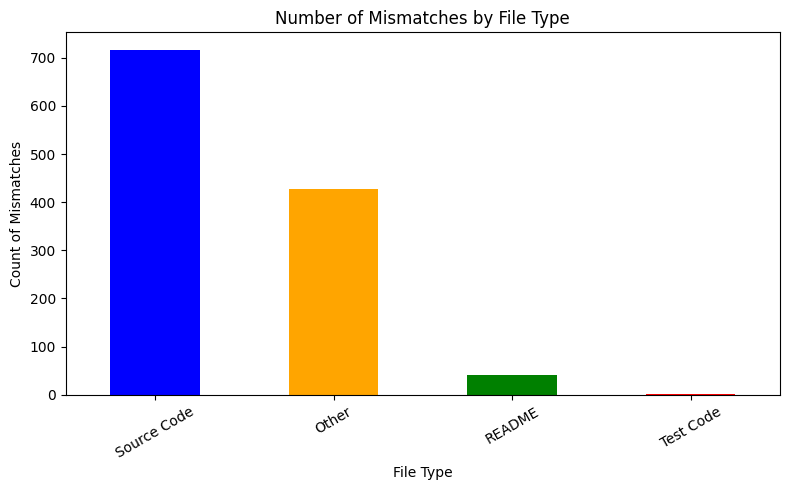

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_FILE = "/content/drive/MyDrive/Lab_4_Output_text-generation.csv"  # Your previously generated CSV file
df = pd.read_csv(CSV_FILE)

# Filter only rows where Discrepancy == 'Yes'
df_mismatch = df[df['Discrepancy'] == 'Yes']

# Helper: Categorize file type
def categorize_file(path):
    if isinstance(path, str):
        filename = path.lower()

        if filename.startswith("readme"):
            return "README"
        elif filename.startswith("license"):
            return "LICENSE"

        elif "test" in filename:
            return "Test Code"

        elif filename.endswith(('.py', '.java', '.cpp', '.c', '.js')):
            return "Source Code"
    return "Other"

# Apply categorization on both old and new file paths
df_mismatch['category'] = df_mismatch['new_file_path'].apply(categorize_file)

# Count mismatches per category
category_counts = df_mismatch['category'].value_counts()

# Print counts
print("Mismatch counts by category:")
print(category_counts)

# Plot bar chart
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'gray'])
plt.title('Number of Mismatches by File Type')
plt.xlabel('File Type')
plt.ylabel('Count of Mismatches')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [9]:
!git clone https://github.com/pytube/pytube.git


Cloning into 'pytube'...
remote: Enumerating objects: 6970, done.
remote: Total 6970 (delta 0), reused 0 (delta 0), pack-reused 6970 (from 1)
Receiving objects: 100% (6970/6970), 18.99 MiB | 34.91 MiB/s, done.
Resolving deltas: 100% (4631/4631), done.


In [10]:
import csv
import os
import subprocess
from pydriller import Repository

REPO_PATH = r"/content/pytube"
OUTPUT_CSV = "/content/drive/MyDrive/Lab_4_Output_pytube.csv"

# Helper: Run git diff command
def get_git_diff(repo_path, commit_sha, parent_sha, diff_algo="myers"):
    """
    Generate diff using git for a given commit and parent.
    diff_algo can be 'myers' or 'histogram'.
    """
    cmd = [
        "git", "-C", repo_path, "diff",
        parent_sha, commit_sha,
        f"--diff-algorithm={diff_algo}",
        "--ignore-all-space", "--ignore-blank-lines"
    ]
    try:
        diff_output = subprocess.check_output(cmd, stderr=subprocess.DEVNULL)
        return diff_output.decode("utf-8", errors="ignore")
    except subprocess.CalledProcessError:
        return ""

# Main Processing
with open(OUTPUT_CSV, mode="w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    # Header
    writer.writerow([
        "repo", "old_file_path", "new_file_path", "commit_sha",
        "parent_commit_sha", "commit_message", "diff_myers",
        "diff_histogram", "Discrepancy"
    ])

    repo_name = os.path.basename(REPO_PATH)
    print(f"Analyzing repository: {repo_name}")

    # Iterate commits using PyDriller
    for commit in Repository(path_to_repo=REPO_PATH).traverse_commits():
        commit_sha = commit.hash
        parents = commit.parents
        commit_msg = commit.msg.strip()

        # If no parent (initial commit), skip
        if not parents:
            continue

        parent_sha = parents[0]  # Taking the first parent (skip merge complexity)

        # Get diffs for each modified file
        for mod in commit.modified_files:
            old_path = mod.old_path or ""
            new_path = mod.new_path or ""


            diff_myers = get_git_diff(REPO_PATH, commit_sha, parent_sha, diff_algo="myers")
            diff_hist = get_git_diff(REPO_PATH, commit_sha, parent_sha, diff_algo="histogram")
            discrepancy = "No" if diff_myers.strip() == diff_hist.strip() else "Yes"

            # Write to CSV
            writer.writerow([
                repo_name, old_path, new_path, commit_sha, parent_sha,
                commit_msg, diff_myers, diff_hist, discrepancy
            ])

print(f"\n Diff analysis completed for {repo_name}. Data saved to {OUTPUT_CSV}")


Analyzing repository: pytube

 Diff analysis completed for pytube. Data saved to /content/drive/MyDrive/Lab_4_Output_pytube.csv


Mismatch counts by category:
category
Source Code    187
Other           99
Test Code       93
README          16
Name: count, dtype: int64


/tmp/ipython-input-2713361234.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mismatch['category'] = df_mismatch['new_file_path'].apply(categorize_file)


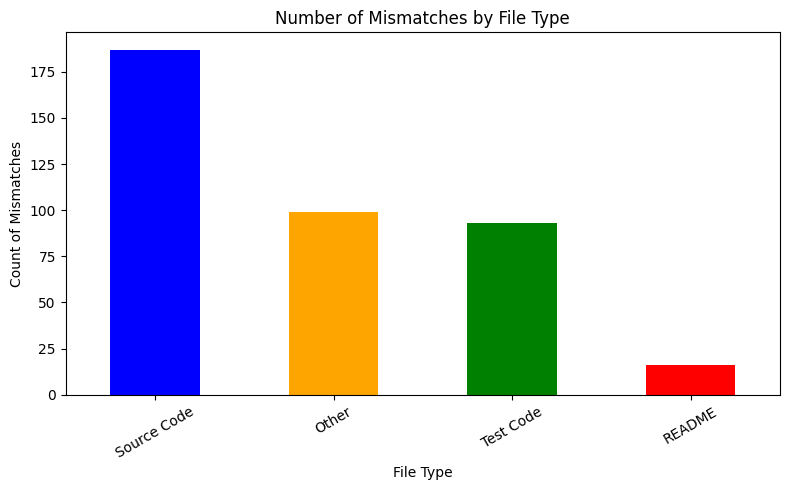

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_FILE = "/content/drive/MyDrive/Lab_4_Output_pytube.csv"
df = pd.read_csv(CSV_FILE)

# Filter only rows where Discrepancy == 'Yes'
df_mismatch = df[df['Discrepancy'] == 'Yes']

# Helper: Categorize file type
def categorize_file(path):
    if isinstance(path, str):
        filename = path.lower()

        if filename.startswith("readme"):
            return "README"
        elif filename.startswith("license"):
            return "LICENSE"

        elif "test" in filename:
            return "Test Code"

        elif filename.endswith(('.py', '.java', '.cpp', '.c', '.js')):
            return "Source Code"
    return "Other"

# Apply categorization on both old and new file paths
df_mismatch['category'] = df_mismatch['new_file_path'].apply(categorize_file)


# Count mismatches per category

category_counts = df_mismatch['category'].value_counts()

# Print counts
print("Mismatch counts by category:")
print(category_counts)

# Plot bar chart
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'gray'])
plt.title('Number of Mismatches by File Type')
plt.xlabel('File Type')
plt.ylabel('Count of Mismatches')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Repository** **3**

In [12]:
!git clone https://github.com/ungoogled-software/ungoogled-chromium.git

Cloning into 'ungoogled-chromium'...
remote: Enumerating objects: 22072, done.
remote: Counting objects: 100% (1624/1624), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 22072 (delta 1535), reused 1426 (delta 1422), pack-reused 20448 (from 3)
Receiving objects: 100% (22072/22072), 17.57 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (14919/14919), done.


In [14]:
import csv
import os
import subprocess
from pydriller import Repository

REPO_PATH = r"/content/ungoogled-chromium"
OUTPUT_CSV = "/content/drive/MyDrive/Lab_4_Output_ungoogled-chromium.csv"

def get_git_diff(repo_path, commit_sha, parent_sha, diff_algo="myers"):

    cmd = [
        "git", "-C", repo_path, "diff",
        parent_sha, commit_sha,
        f"--diff-algorithm={diff_algo}",
        "--ignore-all-space", "--ignore-blank-lines"
    ]
    try:
        diff_output = subprocess.check_output(cmd, stderr=subprocess.DEVNULL)
        return diff_output.decode("utf-8", errors="ignore")
    except subprocess.CalledProcessError:
        return ""


# Main Processing
with open(OUTPUT_CSV, mode="w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    # Header
    writer.writerow([
        "repo", "old_file_path", "new_file_path", "commit_sha",
        "parent_commit_sha", "commit_message", "diff_myers",
        "diff_histogram", "Discrepancy"
    ])

    repo_name = os.path.basename(REPO_PATH)
    print(f"Analyzing repository: {repo_name}")

    # Iterate commits using PyDriller
    for commit in Repository(path_to_repo=REPO_PATH).traverse_commits():
        commit_sha = commit.hash
        parents = commit.parents
        commit_msg = commit.msg.strip()

        # If no parent (initial commit), skip
        if not parents:
            continue

        parent_sha = parents[0]  # Taking the first parent (skip merge complexity)

        # Get diffs for each modified file
        for mod in commit.modified_files:
            old_path = mod.old_path or ""
            new_path = mod.new_path or ""

            diff_myers = get_git_diff(REPO_PATH, commit_sha, parent_sha, diff_algo="myers")
            diff_hist = get_git_diff(REPO_PATH, commit_sha, parent_sha, diff_algo="histogram")
            discrepancy = "No" if diff_myers.strip() == diff_hist.strip() else "Yes"

            # Write to CSV
            writer.writerow([
                repo_name, old_path, new_path, commit_sha, parent_sha,
                commit_msg, diff_myers, diff_hist, discrepancy
            ])

print(f"\n Diff analysis completed for {repo_name}. Data saved to {OUTPUT_CSV}")


Analyzing repository: ungoogled-chromium

 Diff analysis completed for ungoogled-chromium. Data saved to /content/drive/MyDrive/Lab_4_Output_ungoogled-chromium.csv


/tmp/ipython-input-2363082014.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mismatch['category'] = df_mismatch['new_file_path'].apply(categorize_file)


Mismatch counts by category:
category
Other          4188
Source Code     164
README           15
Name: count, dtype: int64


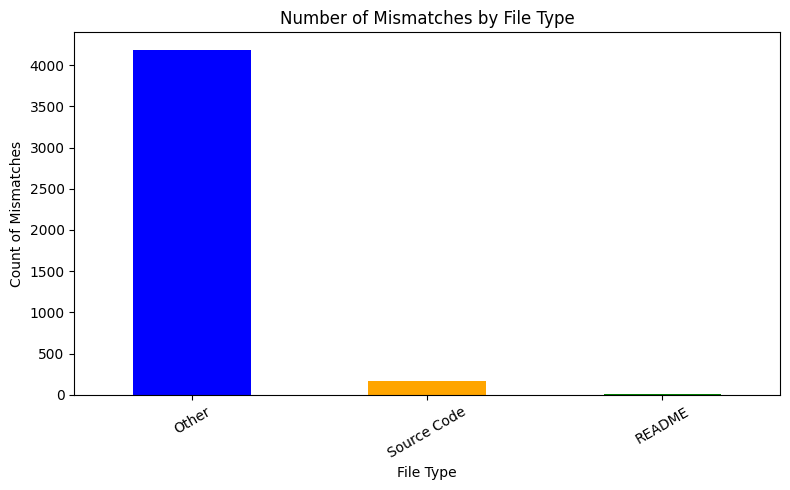

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_FILE = "/content/drive/MyDrive/Lab_4_Output_ungoogled-chromium.csv"
df = pd.read_csv(CSV_FILE)

# Filter only rows where Discrepancy == 'Yes'
df_mismatch = df[df['Discrepancy'] == 'Yes']

# Helper: Categorize file type
def categorize_file(path):
    if isinstance(path, str):
        filename = path.lower()

        if filename.startswith("readme"):
            return "README"
        elif filename.startswith("license"):
            return "LICENSE"

        elif "test" in filename:
            return "Test Code"

        elif filename.endswith(('.py', '.java', '.cpp', '.c', '.js')):
            return "Source Code"
    return "Other"

# Apply categorization on both old and new file paths
df_mismatch['category'] = df_mismatch['new_file_path'].apply(categorize_file)

# Count mismatches per category
category_counts = df_mismatch['category'].value_counts()

# Print counts
print("Mismatch counts by category:")
print(category_counts)

# Plot bar chart
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'gray'])
plt.title('Number of Mismatches by File Type')
plt.xlabel('File Type')
plt.ylabel('Count of Mismatches')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
